# Tutorial 1: TC risk and adaptation options in the Caribbean 

In [ ]:
# This juypter notebook processes the raw input data and generated the hazard, exposure and damage layer for this exercise. The files are then automatically saved and will be opened and modified in the following scripts. 
# You only have to run this script once (expect it to take a couple of hours if you run all islands at the same time), the following scripts run faster. 
# For more information, please check CLIMADA on Github (including the handbook and tutorials)

# Hazard

In [3]:
from climada.hazard import TCTracks, TropCyclone, Centroids

ibtracks_na = TCTracks() 
ibtracks_na.read_ibtracs_netcdf(provider = 'usa', basin = 'NA', year_range = (1980,2020), correct_pres= 'TRUE')
print('num tracks hist:', ibtracks_na.size)

ibtracks_na.equal_timestep(0.5)  # Interpolation to make the track smooth and to allow applying calc_perturbed_trajectories
# Add randomly generated tracks using the calc_perturbed_trajectories method (5 per historical track)
ibtracks_na.calc_perturbed_trajectories(nb_synth_tracks=5)
print('num tracks hist+syn:', ibtracks_na.size)

2021-09-20 09:58:46,618 - climada.hazard.tc_tracks - WARNING - `correct_pres` is deprecated. Use `estimate_missing` instead.
2021-09-20 09:58:49,393 - climada.hazard.tc_tracks - INFO - Progress: 10%
2021-09-20 09:58:50,212 - climada.hazard.tc_tracks - INFO - Progress: 20%
2021-09-20 09:58:51,025 - climada.hazard.tc_tracks - INFO - Progress: 30%
2021-09-20 09:58:51,832 - climada.hazard.tc_tracks - INFO - Progress: 40%
2021-09-20 09:58:52,663 - climada.hazard.tc_tracks - INFO - Progress: 50%
2021-09-20 09:58:53,475 - climada.hazard.tc_tracks - INFO - Progress: 60%
2021-09-20 09:58:54,374 - climada.hazard.tc_tracks - INFO - Progress: 70%
2021-09-20 09:58:55,195 - climada.hazard.tc_tracks - INFO - Progress: 81%
2021-09-20 09:58:56,048 - climada.hazard.tc_tracks - INFO - Progress: 91%
2021-09-20 09:58:56,778 - climada.hazard.tc_tracks - INFO - Progress: 100%
num tracks hist: 651
2021-09-20 09:58:56,800 - climada.hazard.tc_tracks - INFO - Interpolating 651 tracks to 0.5h time steps.
2021-09-

## Exposure 

In [11]:
%matplotlib inline
import numpy as np
from climada.entity.exposures import LitPop

In [12]:
# Country List
#countryl = ["AIA","ATG","BHS","DMA","DOM","HTI","KNA","MSR","PRI","TCA","VGB" ] # available in litpop
# source litpop: nfw AIA ATG BHS DMA KNA MSR PRI TCA VGB pc (produced capital) DOM HTI

In [13]:
country = "Jamaica"

In [14]:
# Initiate a LitPop exposure entity:
exp = LitPop()
exp.set_country(country, fin_mode='pc', res_arcsec=30, exponents=(1,1))  
#exp.plot_raster() 

2021-09-20 10:31:12,257 - climada.entity.exposures.base - INFO - meta set to default value {}
2021-09-20 10:31:12,258 - climada.entity.exposures.base - INFO - tag set to default value  File: 
 Description: 
2021-09-20 10:31:12,260 - climada.entity.exposures.base - INFO - ref_year set to default value 2018
2021-09-20 10:31:12,261 - climada.entity.exposures.base - INFO - value_unit set to default value USD
2021-09-20 10:31:12,263 - climada.entity.exposures.base - INFO - crs set to default value: EPSG:4326
2021-09-20 10:31:13,576 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30 arcsec.
2021-09-20 10:31:22,460 - climada.entity.exposures.gpw_import - INFO - Reference year: 2016. Using nearest available year for GWP population data: 2015
2021-09-20 10:31:22,462 - climada.entity.exposures.gpw_import - INFO - GPW Version v4.13
2021-09-20 10:31:37,265 - climada.util.finance - INFO - GDP JAM 2014: 1.390e+10.
2021-09-20 10:31:37,748 - climada.util.finance - 

In [15]:
import os
from climada.util import save, load

save('exp_jam.h5', exp)

2021-09-20 10:31:38,032 - climada.util.save - INFO - Written file /Users/tmb/Documents/CLIMADA/climada_python-2.1.1/results/exp_jam.h5


2021-09-20 10:31:38,069 - climada.util.coordinates - INFO - Raster from resolution 0.008333333333325754 to 0.008333333333325754.


<GeoAxesSubplot:>

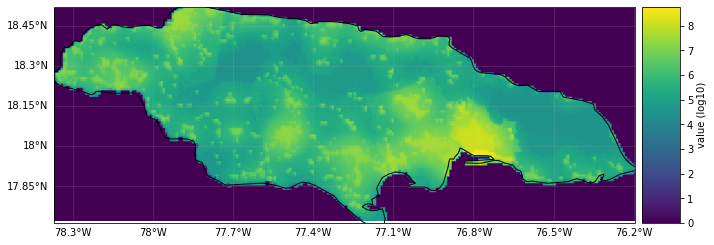

In [17]:
# Plot exposure
exp.plot_raster() 

In [16]:
# Define the centroids from the exposures position
centrs = Centroids()
lat = exp.gdf['latitude'].values
lon = exp.gdf['longitude'].values
centrs.set_lat_lon(lat, lon)
centrs.check()

In [18]:
# Using the tracks, compute the windspeed at the location of the centroids
tc = TropCyclone()
tc.set_from_tracks(ibtracks_na, centrs)
tc.check()

2021-09-20 10:31:44,370 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2021-09-20 10:31:46,631 - climada.util.coordinates - INFO - dist_to_coast: UTM 32617 (1/2)
2021-09-20 10:31:47,729 - climada.util.coordinates - INFO - dist_to_coast: UTM 32618 (2/2)
2021-09-20 10:31:52,311 - climada.hazard.trop_cyclone - INFO - Mapping 3906 tracks to 13550 coastal centroids.
2021-09-20 10:32:19,482 - climada.hazard.trop_cyclone - INFO - Progress: 10%
2021-09-20 10:32:56,098 - climada.hazard.trop_cyclone - INFO - Progress: 20%
2021-09-20 10:33:14,156 - climada.hazard.trop_cyclone - INFO - Progress: 30%
2021-09-20 10:34:00,033 - climada.hazard.trop_cyclone - INFO - Progress: 40%
2021-09-20 10:34:56,425 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2021-09-20 10:36:13,149 - climada.hazard.trop_cyclone - INFO - Progress: 60%
2021-09-20 10:37:17,043 - climada.hazard.trop_cyclone - INFO - Progress: 70%
2021-09-20 10:38:07,913 - climada.hazard.trop_cyclone 

In [19]:
import os
from climada.util import save, load

### Uncomment this to save - saves by default to ./results/
save('tc_jam.h5', tc)

2021-09-20 10:39:23,099 - climada.util.save - INFO - Written file /Users/tmb/Documents/CLIMADA/climada_python-2.1.1/results/tc_jam.h5


2021-09-20 10:39:23,106 - climada.hazard.base - WARNING - Return period 250.0 exceeds max. event return period.
2021-09-20 10:39:23,107 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 25  50 100 250]


(array([[<GeoAxesSubplot:title={'center':'Return period: 25 years'}>,
         <GeoAxesSubplot:title={'center':'Return period: 50 years'}>],
        [<GeoAxesSubplot:title={'center':'Return period: 100 years'}>,
         <GeoAxesSubplot:title={'center':'Return period: 250 years'}>]],
       dtype=object),
 array([[38.38030731, 38.46240165, 38.52787673, ..., 41.50902925,
         41.53527412, 41.49155243],
        [47.28752093, 47.43672256, 47.51239453, ..., 50.19182156,
         50.22722898, 50.16424165],
        [56.19473455, 56.41104347, 56.49691234, ..., 58.87461387,
         58.91918384, 58.83693087],
        [67.96943047, 68.2744504 , 68.37379884, ..., 70.35264096,
         70.40932316, 70.3016024 ]]))

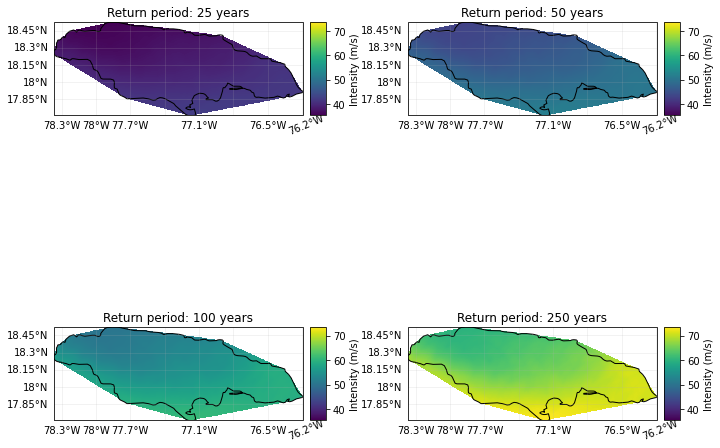

In [20]:
tc.plot_rp_intensity()

# Damage Function

In [21]:
from climada.entity.impact_funcs.trop_cyclone import ImpfSetTropCyclone
from climada.entity import ImpactFuncSet
import matplotlib.pyplot as plt

# generate the default calibrated TC impact functions for different regions
imp_fun_set_TC = ImpfSetTropCyclone()
imp_fun_set_TC.set_calibrated_regional_ImpfSet()

## plot all the impact functions
#imp_fun_set_TC.plot()
## adjust the plots
#plt.tight_layout()
#plt.subplots_adjust(right=1., top=4., hspace=0.4, wspace=0.4)

{'NA1': 66.3,
 'NA2': 89.2,
 'NI': 70.8,
 'OC': 64.1,
 'SI': 52.4,
 'WP1': 66.4,
 'WP2': 188.4,
 'WP3': 112.8,
 'WP4': 190.5,
 'ROW': 110.1}

In [22]:
# Get the hazard type and hazard id
[haz_type] = imp_fun_set_TC.get_hazard_types()
[haz_id] = [1]
print(f"hazard type: {haz_type}, hazard id: {haz_id}")

hazard type: TC, hazard id: 1


In [23]:
# Exposures: rename column and assign id
exp.gdf.rename(columns={"impf_": "impf_" + haz_type}, inplace=True)
exp.gdf['impf_' + haz_type] = haz_id
exp.check()
exp.gdf.head()

2021-09-20 10:39:34,222 - climada.entity.exposures.base - INFO - Hazard type not set in if_
2021-09-20 10:39:34,223 - climada.entity.exposures.base - INFO - category_id not set.
2021-09-20 10:39:34,224 - climada.entity.exposures.base - INFO - cover not set.
2021-09-20 10:39:34,226 - climada.entity.exposures.base - INFO - deductible not set.
2021-09-20 10:39:34,228 - climada.entity.exposures.base - INFO - geometry not set.
2021-09-20 10:39:34,229 - climada.entity.exposures.base - INFO - centr_ not set.


value   latitude  longitude  region_id  if_  impf_TC
0  5.976665e+05  18.270833 -78.370833        388    1        1
1  2.851632e+05  18.262500 -78.370833        388    1        1
2  1.352091e+03  18.254167 -78.370833        388    1        1
3  1.243728e+07  18.270833 -78.362500        388    1        1
4  1.330564e+07  18.262500 -78.362500        388    1        1

In [24]:
# Compute impact
from climada.engine import Impact
imp = Impact()
imp.calc(exp, imp_fun_set_TC, tc, save_mat=True) #Saves the results geographically resolved (only aggregate values)

2021-09-20 10:39:34,260 - climada.entity.exposures.base - INFO - Matching 13550 exposures with 13550 centroids.
2021-09-20 10:39:34,264 - climada.engine.impact - INFO - Calculating damage for 13499 assets (>0) and 3906 events.
2021-09-20 10:39:34,264 - climada.engine.impact - INFO - Missing exposures impact functions for hazard if_TC. Using impact functions in if_.


In [25]:
import os
from climada.util import save, load

### Uncomment this to save - saves by default to ./results/
save('imp_jam.csv', imp)

2021-09-20 10:39:34,522 - climada.util.save - INFO - Written file /Users/tmb/Documents/CLIMADA/climada_python-2.1.1/results/imp_jam.csv


<GeoAxesSubplot:title={'center':'Expected annual impact'}>

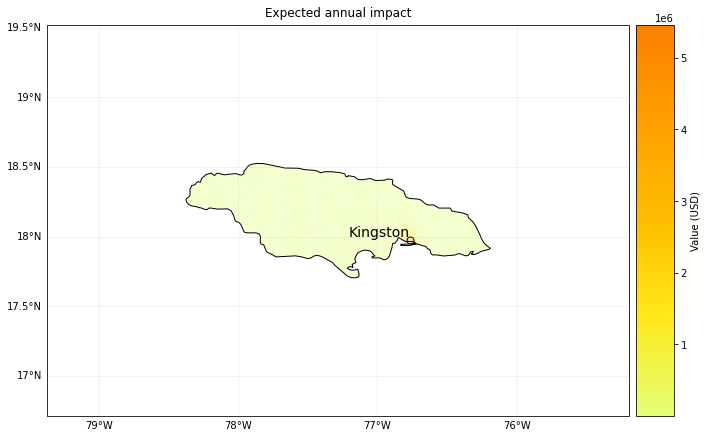

In [26]:
imp.plot_hexbin_eai_exposure(buffer=1)

<GeoAxesSubplot:>

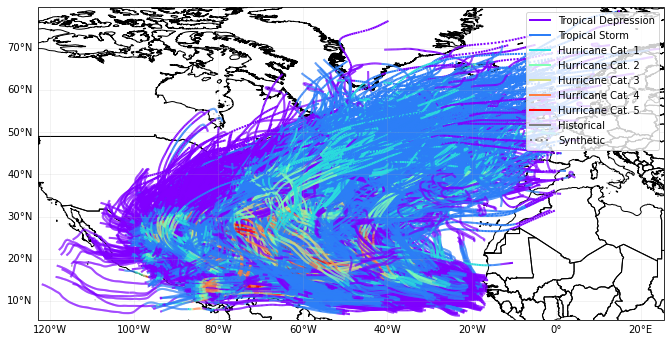

In [4]:
ibtracks_na.plot()